In [26]:
#drive 연동
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import csv
from csv import reader
import pandas as pd

#csv파일 read
#f = open('../gdrive/MyDrive/Colab Notebooks/selfs_meta.csv')
f = open('./selfs_meta.csv')
ff = pd.read_csv(f)

In [28]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake

Cloning into 'khaiii'...
remote: Enumerating objects: 1024, done.
remote: Total 1024 (delta 0), reused 0 (delta 0), pack-reused 1024
Receiving objects: 100% (1024/1024), 33.03 MiB | 13.73 MiB/s, done.
Resolving deltas: 100% (438/438), done.
Checking out files: 100% (131/131), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
cd /content

/content


In [30]:
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

mkdir: cannot create directory ‘build’: File exists
-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-

In [31]:
#해당 직무 관련 추출
job=input("직무를 입력하세요 : ")
con=ff[ff['field'].str.contains(job)==False].index
ff.drop(con,inplace=True)
ff.reset_index(drop=True,inplace=True)

#자소서 내용 부분
content=ff.loc[0:,"content"]

kk_k=[]
word_text=[]
for j in range(len(content)):
  kk=content[j].split('wn')
  kk=kk[0:]
  for i in range(len(kk)):
    word_text=kk[i].split('.')
    kk_k.append([[i]for i in word_text if len(i)>=1])
    
#한문장 단위
from itertools import chain
text_corpus=[[i] for i in list(chain(*list((chain(*kk_k)))))]

arr=[]

#질문 구분 없애기
for i in range(len(text_corpus)):
  for col in text_corpus[i]:
    if '//' in col:
      arr=''.join(text_corpus[i]).split('//')
      text_corpus[i]=arr[1]
    else:
      text_corpus[i]=text_corpus[i]
#text_corpus[0:]


직무를 입력하세요 : 웹


In [32]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

#형태소 분석
text_sentence=[]

#키워드 -> 명사들만 보이게 처리
for i in range(len(text_corpus)):
  morphs = []
  for word in api.analyze(text_corpus[i][0]):
    for morph in word.morphs:    
      if morph.tag=="NNG" or morph.tag=="NNP" or morph.tag=="NNB":
        morphs.append((morph.lex)) #morph.tag
  text_sentence.append(morphs)

text_sentence_1=[]
#명사, 동사, 형용사
for i in range(len(text_corpus)):
  morphs_1 = []
  for word in api.analyze(text_corpus[i][0]):
    for morph in word.morphs:
      if morph.tag=="NNG" or morph.tag=="NNP" or morph.tag=="NNB" or morph.tag=="VV" or morph.tag=="VA":
        morphs_1.append((morph.lex)) #morph.tag
  text_sentence_1.append(morphs_1)

from gensim.models import Word2Vec
#skip gram model
#embedding_skipgram_model = Word2Vec(text_sentence, size=100, window = 3, min_count=3, workers=4, iter=100, sg=1) #명사버전
embedding_skipgram_model_1 = Word2Vec(text_sentence_1, size=100, window = 3, min_count=3, workers=4, iter=100, sg=1) #명사+형용사+동사버전

#CBOW model
#embedding_cbow_model = Word2Vec(text_sentence, size=100, window = 3, min_count=3, workers=4, iter=100, sg=0)  #명사버전
#embedding_cbow_model_1 = Word2Vec(text_sentence_1, size=100, window = 3, min_count=3, workers=4, iter=100, sg=0) #명사+형용사+동사버전

#print(embedding_skipgram_model_1.most_similar(positive=["웹"], topn=20))

#시각화
inputKeyword=input("keyword를 입력하세요 : ")
keyword =embedding_skipgram_model_1.most_similar(positive=[inputKeyword], topn=30)
keyword_list = []
for i in range(len(keyword)):
  keyword_list.append(keyword[i]) #튜플을 리스트로
keyword_dict=dict(keyword_list)

keyword를 입력하세요 : 백엔드


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [33]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [35]:
cd ./gdrive/MyDrive/Colab\ Notebooks

/content/gdrive/MyDrive/Colab Notebooks


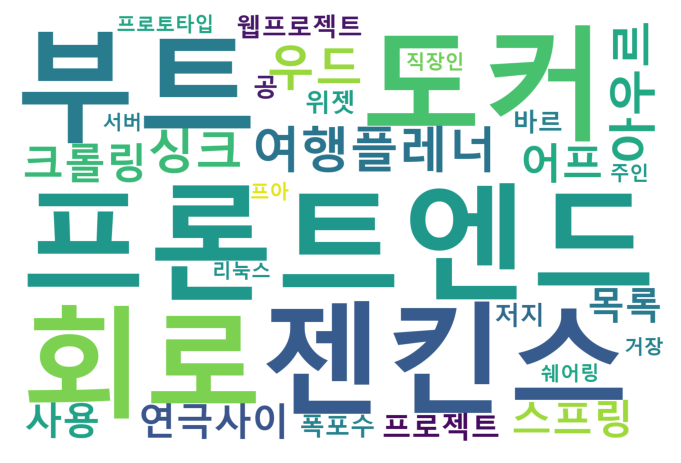

In [36]:
wordcloud = WordCloud(font_path = './malgunbd.ttf', background_color='white', width=1500, height=1000).generate_from_frequencies(keyword_dict)
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

In [38]:
cd ./keyword.ipynb

[Errno 20] Not a directory: './keyword.ipynb'
/content/gdrive/MyDrive/Colab Notebooks
